In [1]:
import matplotlib.pyplot as plt

# Exercise 1

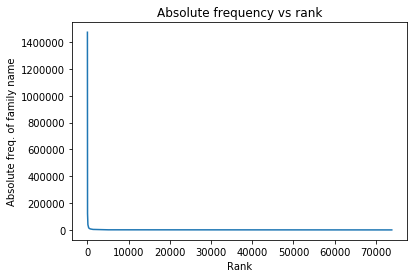

In [2]:
import csv
cognom_freq = []
with open('apellidos.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=';')
    for row in reader:
        if row[1] == 'Apellido':
            continue
        cognom_freq.append(int(row[2]))

from math import log
plt.figure(1)
plt.plot(range(len(cognom_freq)), cognom_freq)
plt.title('Absolute frequency vs rank')
plt.ylabel('Absolute freq. of family name')
plt.xlabel('Rank')
plt.show()

# Exercise 3+4

In [3]:
x1 = 100
x2 = 10000
y1 = cognom_freq[x1]
y2 = cognom_freq[x2]
print(y1, y2)

43663 356


In [4]:
approx_gradient = (log(y2)-log(y1))/(log(x2)-log(x1))
print(approx_gradient)
log_approx_intercept = log(y2)-approx_gradient*log(x2)
print(log_approx_intercept)
from math import exp
approx_intercept = exp(log_approx_intercept)
print(approx_intercept)

-1.0443317869782418
15.493581950195763
5355217.890449433


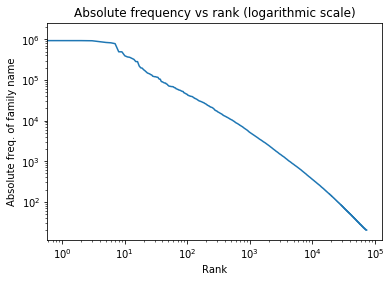

In [5]:
plt.loglog(range(len(cognom_freq)), cognom_freq)
plt.title('Absolute frequency vs rank (logarithmic scale)')
plt.ylabel('Absolute freq. of family name')
plt.xlabel('Rank')
plt.show()

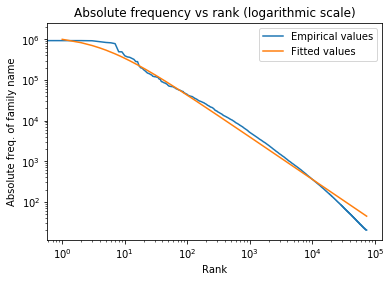

In [6]:
plt.loglog(range(len(cognom_freq)), cognom_freq)
plt.title('Absolute frequency vs rank (logarithmic scale)')
plt.ylabel('Absolute freq. of family name')
plt.xlabel('Rank')
supp = range(1, len(cognom_freq)+1)
b = 4
y = [approx_intercept*((x+b)**approx_gradient) for x in supp]
plt.loglog(supp, y)
plt.legend(['Empirical values', 'Fitted values'])
plt.show()

# Exercise 6

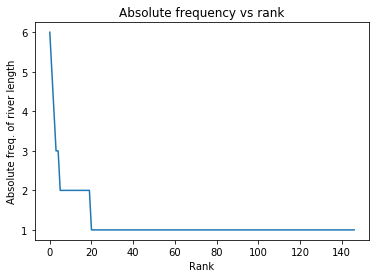

In [7]:
river_length_freq = {}
with open('rivers.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=';')
    for row in reader:
        if row[1] == 'River':
            continue
        elif row[2] in river_length_freq.keys():
            river_length_freq[row[2]] += 1
        else:
            river_length_freq[row[2]] = 1

values = list(river_length_freq.values())
plt.figure(1)
plt.plot(range(len(values)), sorted(values, reverse=True))
plt.title('Absolute frequency vs rank')
plt.ylabel('Absolute freq. of river length')
plt.xlabel('Rank')
plt.show()

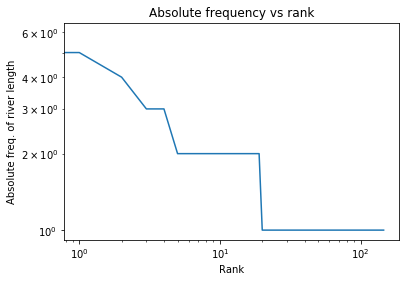

In [8]:
plt.figure(2)
plt.loglog(range(len(values)), sorted(values, reverse=True))
plt.title('Absolute frequency vs rank')
plt.ylabel('Absolute freq. of river length')
plt.xlabel('Rank')
plt.show()

We can try checking the river lengths as a continuous distribution and see what happens:

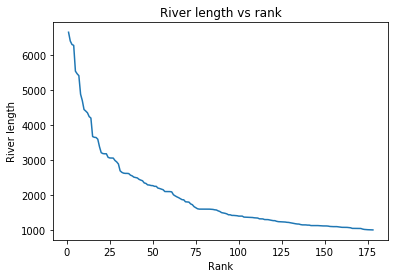

In [9]:
river_lengths = []
with open('rivers.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=';')
    for row in reader:
        if row[1] == 'River':
            continue
        river_lengths.append(int(row[2]))
    river_lengths = sorted(river_lengths, reverse=True)

plt.figure(1)
supp = range(1, len(river_lengths)+1)
plt.plot(supp, river_lengths)
plt.title('River length vs rank')
plt.ylabel('River length')
plt.xlabel('Rank')
plt.show()

And try to scale the axes logarithmically:

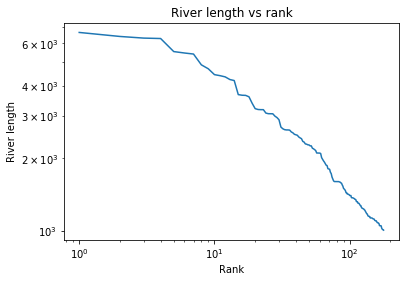

In [10]:
plt.figure(1)
plt.loglog(supp, river_lengths)
plt.title('River length vs rank')
plt.ylabel('River length')
plt.xlabel('Rank')
plt.show()

amogus outlier: Amazon  Ucayali  Apurímac


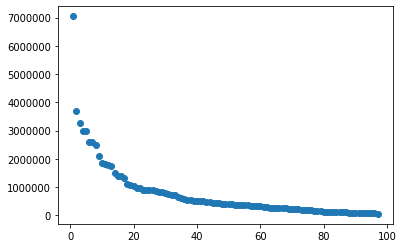

In [11]:
basin_area = []
with open('rivers.csv', newline='', encoding='utf8') as csvfile:
    reader = csv.reader(csvfile, delimiter=';')
    for row in reader:
        if row[1] == 'River' or row[4] == '':
            continue
        basin_area.append(int(row[4]))
        if int(row[4]) > 4000000:
            print('amogus outlier:', row[1])
    basin_area = sorted(basin_area, reverse=True)
plt.figure(1)
plt.scatter(range(1, len(basin_area)+1), basin_area)
plt.show()

# Exercise 7

In [12]:
from os import listdir
from os.path import join, isfile

def readWords(path, output_filename):
    dd = {}
    for f in listdir(path):
        ff = join(path, f)
        if not isfile(ff):
            continue
        for line in open(ff, 'r', encoding='utf8'):
            for punct in ['.', ',', '!', '?', ';', ':', '¿', '=', '+', '/', '&', '\'', '\"']:
                line = line.replace(punct, ' ')
            for word in line.lower().split():
                if word in dd.keys():
                    dd[word] += 1
                else:
                    dd[word] = 1
    l = list(sorted(dd.items(), key=lambda x: x[1], reverse=True))
    if (not output_filename.endswith('.csv')):
        output_filename += '.csv'
    with open(output_filename, 'w', newline='', encoding='utf8') as csvfile:
        writer = csv.writer(csvfile, delimiter=';')
        writer.writerow(['Rank', 'Word', 'Absolute Frequency'])
        for i in range(len(l)):
            writer.writerow([i+1]+list(l[i]))

In [13]:
readWords('novels', 'words.csv')

# Exercise 8

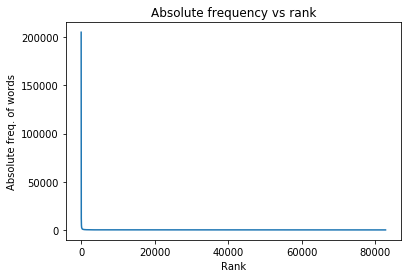

In [14]:
word_freq = []
with open('words.csv', newline='', encoding='utf8') as csvfile:
    reader = csv.reader(csvfile, delimiter=';')
    for row in reader:
        if row[1] == 'Word':
            continue
        word_freq.append(int(row[2]))

plt.figure(1)
plt.plot(range(len(word_freq)), word_freq)
plt.title('Absolute frequency vs rank')
plt.ylabel('Absolute freq. of words') # in the 'novels' directory
plt.xlabel('Rank')
plt.show()

In [15]:
x1 = 10**2
x2 = 10**4
y1 = word_freq[x1]
y2 = word_freq[x2]

approx_gradient = (log(y2)-log(y1))/(log(x2)-log(x1))
print(approx_gradient)
log_approx_intercept = log(y2)-approx_gradient*log(x2)
print(log_approx_intercept)
approx_intercept = exp(log_approx_intercept)
print(approx_intercept)

-1.113943352306837
13.204236409012589
542659.0000000008


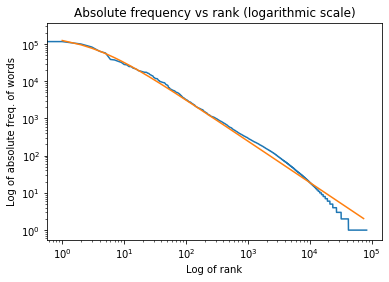

In [16]:
plt.loglog(range(len(word_freq)), word_freq)
plt.title('Absolute frequency vs rank (logarithmic scale)')
plt.ylabel('Log of absolute freq. of words')
plt.xlabel('Log of rank')
supp = range(1, len(cognom_freq)+1)
b = 2.75
y = [approx_intercept*((x+b)**approx_gradient) for x in supp]
plt.loglog(supp, y)
plt.show()

# Exercise 9

In [17]:
def modifiedReadWords(path: str, output_filename: str, k: int) -> None:
    dd = {}
    word_count = 0
    cool_dd = {}
    if output_filename.endswith('.csv'):
        output_filename = output_filename.replace('.csv','')
    for f in listdir(path):
        ff = join(path, f)
        for line in open(ff, 'r', encoding='utf8'):
            for punct in ['.', ',', '!', '?', ';', ':', '¿', '=', '+', '/', '&', '\'', '\"']:
                line = line.replace(punct, ' ')
            for word in line.lower().split():
                word_count += 1
                if word in dd.keys():
                    dd[word] += 1
                else:
                    dd[word] = 1
                if word_count % k == 0:
                    cool_dd[word_count] = len(list(dd.keys()))

    l = list(sorted(dd.items(), key=lambda x: x[1], reverse=True))
    with open(output_filename + '.csv', 'w', newline='', encoding='utf8') as csvfile:
        writer = csv.writer(csvfile, delimiter=';')
        writer.writerow(['Rank', 'Word', 'Absolute Frequency'])
        for i in range(len(l)):
            writer.writerow([i+1]+list(l[i]))

    with open(output_filename+".diff_words.csv", 'w', newline='', encoding='utf8') as csvfile:
        writer = csv.writer(csvfile, delimiter=';')
        writer.writerow(['ik', 'Number of different words'])
        for k in cool_dd.keys():
            writer.writerow([k, cool_dd[k]])

In [18]:
modifiedReadWords('novels', 'output', 100)

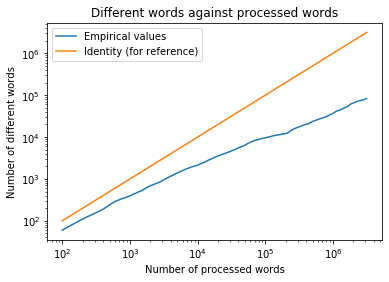

In [19]:
diff_words = {}
with open('output.diff_words.csv', newline='', encoding='utf8') as csvfile:
    reader = csv.reader(csvfile, delimiter=';')
    for row in reader:
        if row[0] == 'ik':
            continue
        diff_words[int(row[0])] = int(row[1])

plt.figure(1)
x = list(diff_words.keys())
y = list(diff_words.values())
plt.loglog(x, y)
plt.loglog(x, x)
plt.title('Different words against processed words')
plt.ylabel('Number of different words')
plt.xlabel('Number of processed words')
plt.legend(['Empirical values', 'Identity (for reference)'])
plt.show()

If the blue curve is a line in a log-log plot, then we have that
$$
\log y = k_1+\beta\cdot\log x,
$$
and exponentiating both sides we get
$$
y = k\cdot x^\beta.
$$
We want to estimate both $\beta$ and $k$.

beta = 0.6566539910901379
   k = 4.222155737481986


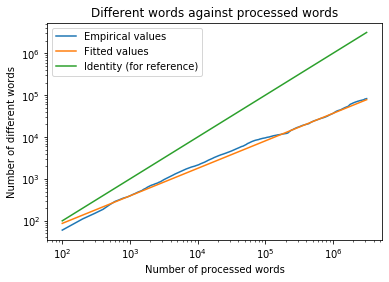

In [20]:
x1 = 10**3
x2 = 10**6
y1 = diff_words[x1]
y2 = diff_words[x2]

approx_beta = (log(y2)-log(y1))/(log(x2)-log(x1))
print('beta =',approx_beta)
approx_k = exp(log(y2)-approx_beta*log(x2))
print('   k =', approx_k)

img = [approx_k*(xx**approx_beta) for xx in x]

plt.figure(1)
plt.loglog(x, y)
plt.loglog(x, img)
plt.loglog(x, x)
plt.title('Different words against processed words')
plt.ylabel('Number of different words')
plt.xlabel('Number of processed words')
plt.legend(['Empirical values', 'Fitted values', 'Identity (for reference)'])
plt.show()